In [16]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/GSPC.csv')
sp500 = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-01-02,740.739990,742.809998,729.549988,737.010010,737.010010,463230000
1997-01-03,737.010010,748.239990,737.010010,748.030029,748.030029,452970000
1997-01-06,748.030029,753.309998,743.820007,747.650024,747.650024,531350000
1997-01-07,747.650024,753.260010,742.179993,753.229980,753.229980,538220000
1997-01-08,753.229980,755.719971,747.710022,748.409973,748.409973,557510000


<AxesSubplot:xlabel='Date'>

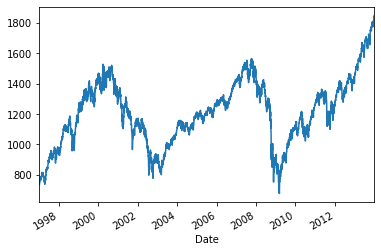

In [3]:
# Plot close data
sp500.Close.plot()

<AxesSubplot:xlabel='Date'>

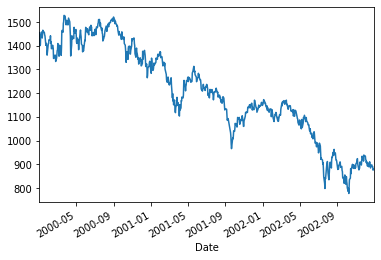

In [4]:
# September 11th attack, bursting of dot-com bubble
sp500.loc['2000':'2002'].Close.plot()

<AxesSubplot:xlabel='Date'>

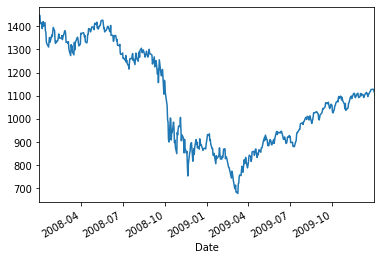

In [5]:
# Plot close data from 2008 to 2009
sp500.loc['2008':'2009'].Close.plot()

<AxesSubplot:xlabel='Date'>

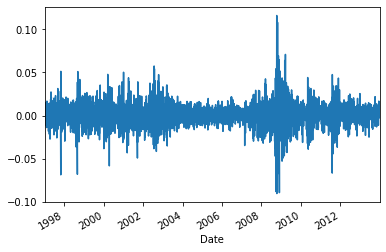

In [6]:
# GARCH assumes stationarity
# Clustering of volatility seen, e.g. 2008-2010
sp500['Close'].pct_change().plot()

In [7]:
# Focus on the 2008-2009 Financial Crisis Period
returns = sp500.loc['2008':'2009'].Close.pct_change() * 100
returns = returns.dropna()
returns.tail()

Date
2009-12-24    0.525617
2009-12-28    0.115408
2009-12-29   -0.140105
2009-12-30    0.019543
2009-12-31   -1.004960
Name: Close, dtype: float64

# GARCH

In [8]:
# 'p' and 'q'  are akin to the 'p' and 'q' of an ARMA model.
# 'vol="GARCH"' means that we're using a GARCH model.
# The 'mean="Zero"' means that we're estimating a GARCH.
from arch import arch_model
model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)

In [17]:
# Fit the GARCH Model
res = model.fit(disp="on")

Iteration:      1,   Func. Count:      5,   Neg. LLF: 258915759.38289857
Iteration:      2,   Func. Count:     11,   Neg. LLF: 996.5592452171413
Iteration:      3,   Func. Count:     16,   Neg. LLF: 993.7668240901139
Iteration:      4,   Func. Count:     21,   Neg. LLF: 1022.0942395259017
Iteration:      5,   Func. Count:     27,   Neg. LLF: 991.2987433731653
Iteration:      6,   Func. Count:     31,   Neg. LLF: 991.1970178207952
Iteration:      7,   Func. Count:     35,   Neg. LLF: 991.2118941691355
Iteration:      8,   Func. Count:     40,   Neg. LLF: 991.1553550572592
Iteration:      9,   Func. Count:     44,   Neg. LLF: 991.1548587825446
Iteration:     10,   Func. Count:     47,   Neg. LLF: 991.1548587831724


In [10]:
# Summarize the model results
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -991.155
Distribution:                  Normal   AIC:                           1988.31
Method:            Maximum Likelihood   BIC:                           2000.98
                                        No. Observations:                  504
Date:                Sun, Apr 18 2021   Df Residuals:                      504
Time:                        20:57:55   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0255  2.268e-02      1.124      0.261 [-1.895e-02,6.993e-02]
alpha[1]       0.0986  2.185e-02      4.512  6.420e-06    [5.577e-02,  0.141]
beta[1]        0.8968  1.882e-02     47.650      0.000      [  0.860,  0.934]
=============================================================================

Covariance estimator: robust
"""

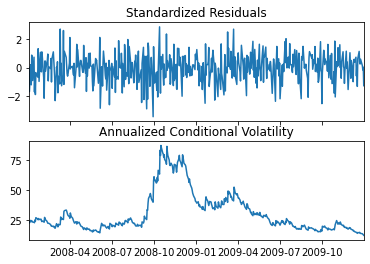

In [11]:
# Plot the model estimate of annualized volatility
fig = res.plot(annualize='D')

# Forecasting from GARCH

In [12]:
# Construct Volatility Forecasts for the next 3 days
forecast_horizon = 3
# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
forecasts = res.forecast(start='2009-12-31', horizon=forecast_horizon)
forecasts

/Users/kumarisurbhi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [13]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate

,h.1,h.2,h.3
Date,,,
2009-12-31,13.007879,13.223021,13.43375


# Visualizing the forecast

In [14]:
# The name of the column here is the date of the forecast.
# Each row represents the forecast of volatility for the following days.
# Transposing makes the forecast easier to plot
final = intermediate.dropna().T
final

Date,2009-12-31 00:00:00
h.1,13.007879
h.2,13.223021
h.3,13.433750


/Users/kumarisurbhi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

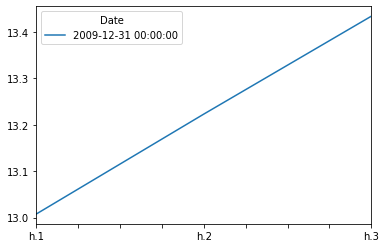

In [15]:
# Plot the forecast
final.plot()